In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df=pd.read_csv('/kaggle/input/ad-click/Ad Click Data.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      999 non-null    object 
 6   Male                      997 non-null    float64
 7   Country                   991 non-null    object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [42]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,987.000000,1000.000000,987.000000,989.000000,997.000000,1000.00000
mean,64.929524,36.009000,54980.667234,179.863620,0.480441,0.50000
std,15.844699,8.785562,13439.998510,43.870142,0.499868,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.270000,29.000000,46947.570000,138.710000,0.000000,0.00000
50%,68.110000,35.000000,57009.760000,182.650000,0.000000,0.50000
75%,78.460000,42.000000,65479.350000,218.790000,1.000000,1.00000
max,91.430000,61.000000,79484.800000,267.010000,1.000000,1.00000


In [43]:
df.isnull().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Ad Topic Line                0
City                         1
Male                         3
Country                      9
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [44]:
df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean(), inplace=True)
df['Area Income'].fillna(df['Area Income'].mean(), inplace=True)
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean(), inplace=True)
df['Male'].fillna(df['Male'].median(), inplace=True)
df['City'].fillna(df['City'].mode()[0], inplace=True)
df['Country'].fillna(df['Country'].mode()[0], inplace=True)

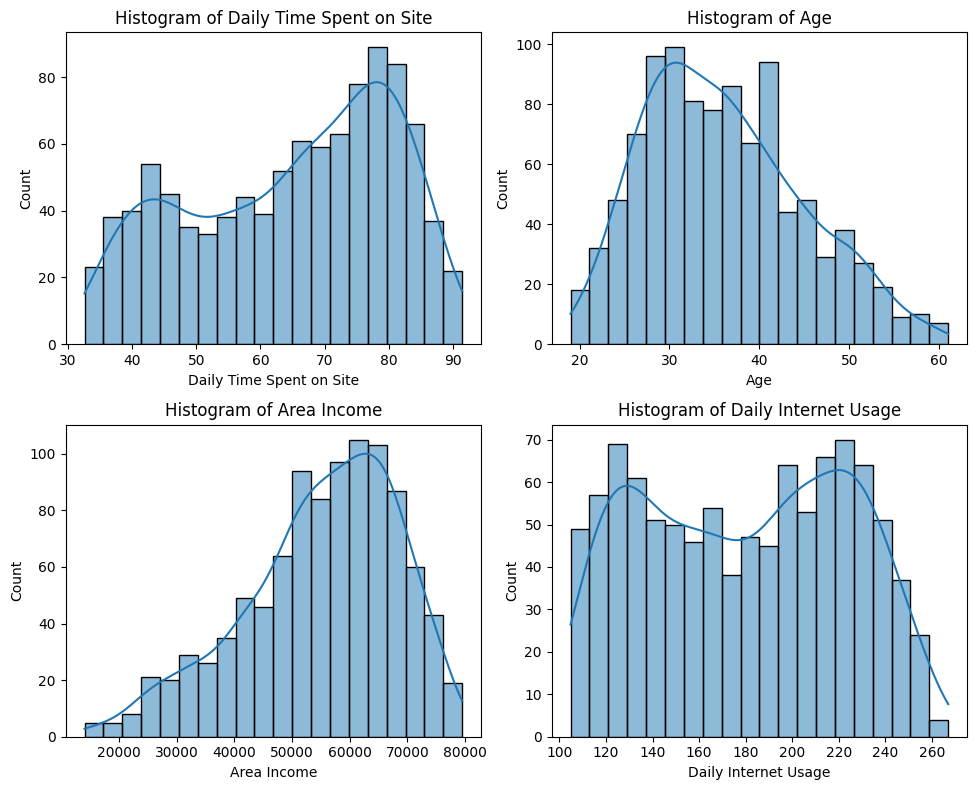

In [45]:
numerical_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

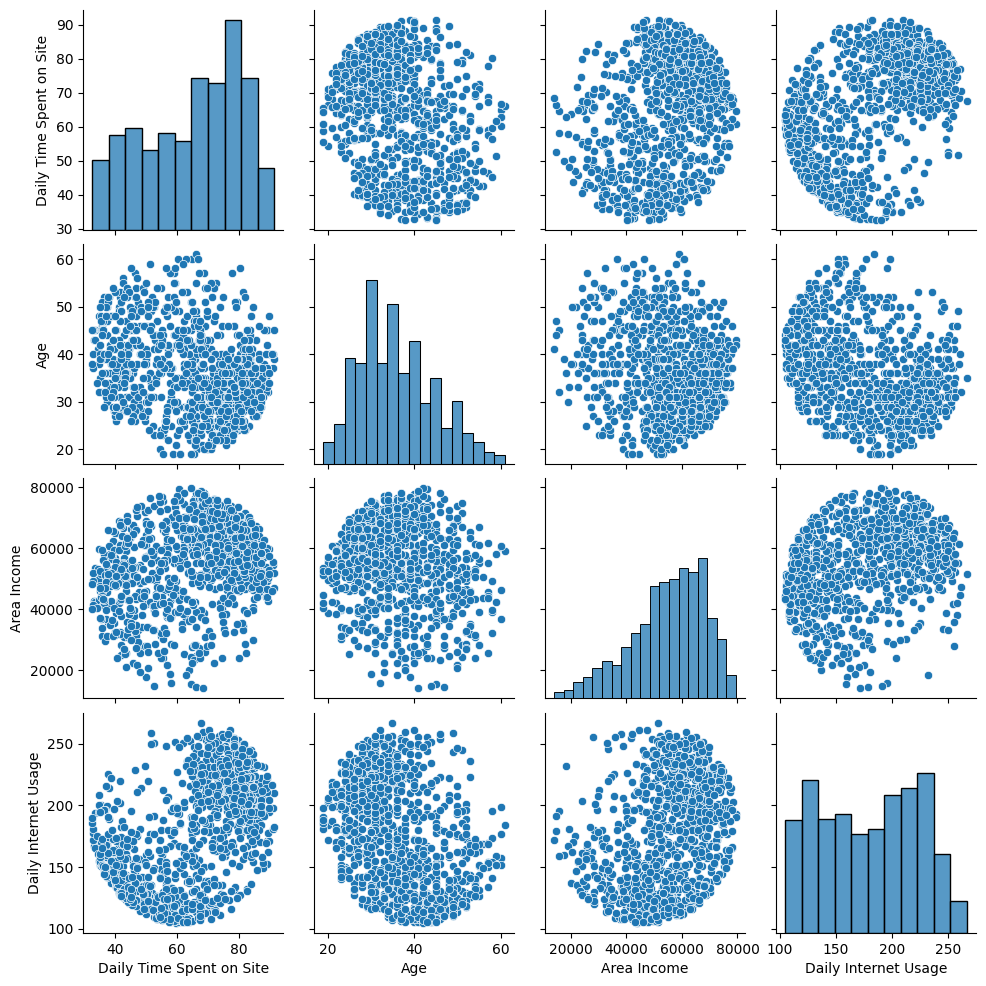

In [46]:
sns.pairplot(df[numerical_cols], kind='scatter')
plt.show()

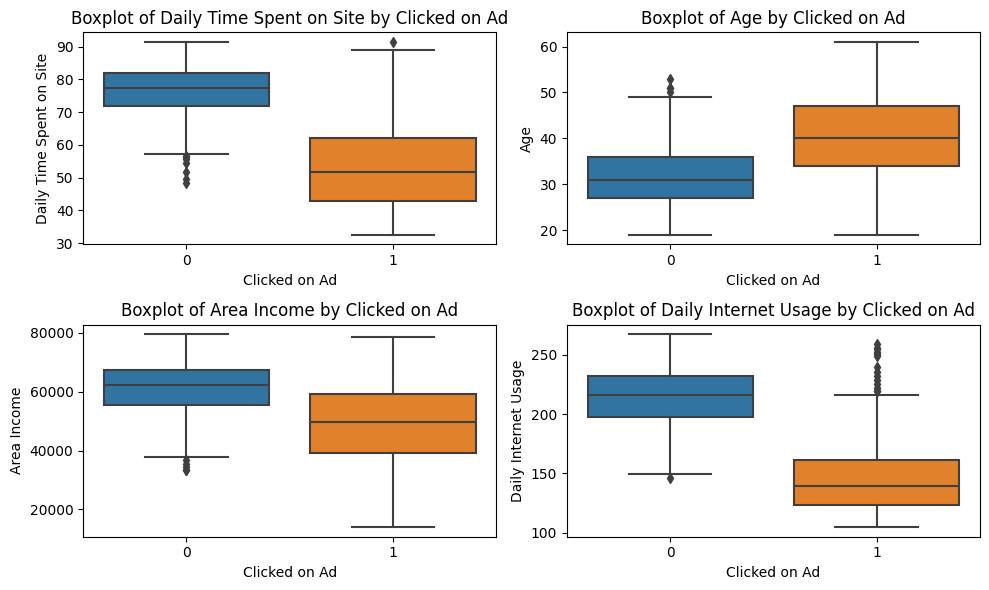

In [47]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Clicked on Ad', y=col, data=df)
    plt.title(f'Boxplot of {col} by Clicked on Ad')
plt.tight_layout()
plt.show()

In [53]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col].astype(str))

In [54]:
features = [col for col in df.columns if col not in ['Timestamp', 'Clicked on Ad']]
X = df[features]
y = df['Clicked on Ad']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [56]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

LogisticRegression()

In [57]:
y_pred = logistic_reg.predict(X_test)

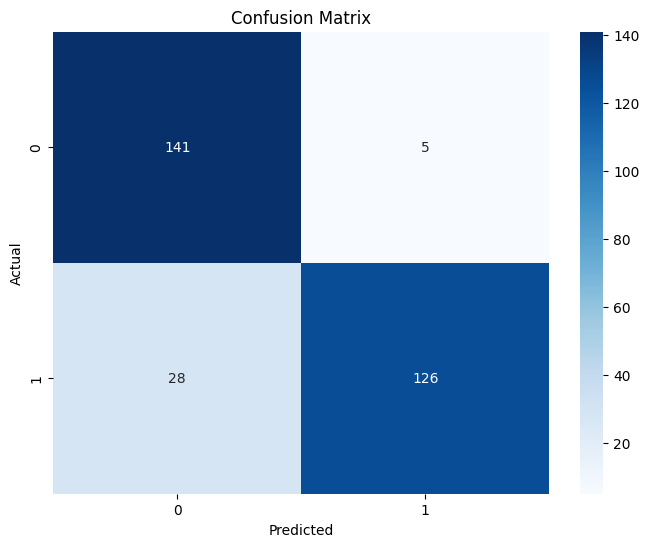

In [58]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()